Image Classification with CNN


For this project, I implement an AlexNet-like deep convolutional neural network with Keras. I use the CNN to classify a dataset with over 1300 images of 17 different categories of flowers from the Oxford Flowers dataset. At the end I will do some transfer learning using VGGNet19.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/the-deep-learners/deep-learning-illustrated/blob/master/notebooks/alexnet_in_keras.ipynb)

#### Load dependencies

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization

In [ ]:
# Defining a function to draw learning curves - Takes an instance of History as input and draws learning curves
def plot_learning_curve(history):
  plt.plot(history.history['acc'])
  plt.plot(history.history['val_acc'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

## Part I Implement and Train AlexNet from Scratch

#### Load and preprocess data

In [ ]:
!pip install tflearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.3/107.3 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for tflearn: filename=tflearn-0.5.0-py3-none-any.whl size=127283 sha256=8a2b9017dc68449ba61f997f7c0e004cf7c15e0a05c7d08844924db2c64d0432
  Stored in directory: /root/.cache/pip/wheels/55/fb/7b/e06204a0ceefa45443930b9a250cb5ebe31def0e4e8245a465
Successfully built tflearn


In [ ]:
!pip uninstall tflearn
!pip install git+https://github.com/MihaMarkic/tflearn.git@fix/is_sequence_missing

  Cloning https://github.com/MihaMarkic/tflearn.git (to revision fix/is_sequence_missing) to /tmp/pip-req-build-go4u21x0
  Running command git clone --filter=blob:none --quiet https://github.com/MihaMarkic/tflearn.git /tmp/pip-req-build-go4u21x0
  Running command git checkout -b fix/is_sequence_missing --track origin/fix/is_sequence_missing
  Switched to a new branch 'fix/is_sequence_missing'
  Branch 'fix/is_sequence_missing' set up to track remote branch 'fix/is_sequence_missing' from 'origin'.
  Resolved https://github.com/MihaMarkic/tflearn.git to commit 6472b8588e758ff4a33a2764d4ee638bbd0e42f0
  Preparing metadata (setup.py) ... done
  Created wheel for tflearn: filename=tflearn-0.5.0-py3-none-any.whl size=130659 sha256=91e602777736e555b8ea5ee66d07d0a422200695e82245200ebef837705d0fa2
  Stored in directory: /tmp/pip-ephem-wheel-cache-hvnk3mdy/wheels/4d/8c/0c/2159783f8dfd53bdaf4e59cd3990607ac8d5d912ae6de88296
Successfully built tflearn


In [ ]:
import tflearn.datasets.oxflower17 as oxflower17
X, Y = oxflower17.load_data(one_hot=True, resize_pics=(227, 227))

Instructions for updating:
non-resource variables are not supported in the long term


100.0% 60276736 / 60270631


Succesfully downloaded 17flowers.tgz 60270631 bytes.
File Extracted
Starting to parse images...
Parsing Done!


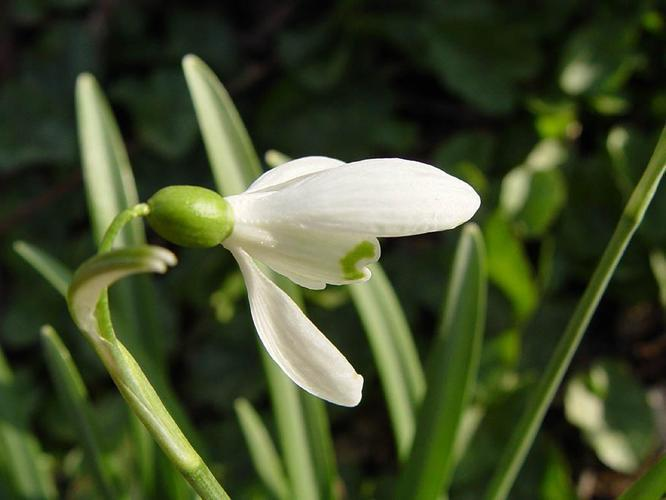

In [ ]:
from PIL import Image #show one example of image
Image.open("17flowers/jpg/1/image_0081.jpg")

In [ ]:
# Take a look at the data
print(X.shape, Y.shape)
print(X[0,:,:,0].shape)
print(X[0,:,:,0])
print(Y[0])

(1360, 227, 227, 3) (1360, 17)
(227, 227)
[[0.5882353  0.5529412  0.5176471  ... 0.5294118  0.52156866 0.45882353]
 [0.54509807 0.52156866 0.49803922 ... 0.4745098  0.5372549  0.5254902 ]
 [0.52156866 0.48235294 0.4745098  ... 0.43137255 0.4        0.36078432]
 ...
 [0.22745098 0.16470589 0.27058825 ... 0.29411766 0.60784316 0.5372549 ]
 [0.19607843 0.16078432 0.20392157 ... 0.2        0.61960787 0.44313726]
 [0.33333334 0.19215687 0.19607843 ... 0.16862746 0.58431375 0.47058824]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


### Design neural network architecture
We are going to create an Alexnet-like convolutional neural network. The architecture of the network is shown below. Let us use ReLU as activation function in convolutional layers and tanh as activation function in the two fully connected layer before the output layer.

Image credit: https://neurohive.io/en/popular-networks/alexnet-imagenet-classification-with-deep-convolutional-neural-networks/

In [ ]:
# define a sequential model
model = Sequential()

# first conv-pool block, i.e., first conv layer and first max pooling layer
# please add batch normalization after this conv block
model.add(Conv2D(96, kernel_size=(11, 11), strides=(4, 4), activation='relu',
                 input_shape=(227, 227, 3)))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
model.add(BatchNormalization())

# second conv-pool block, i.e., 2nd conv layer and 2nd max pooling layer
# please add batch normalization after this conv block
model.add(Conv2D(256, kernel_size=(5, 5), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
model.add(BatchNormalization())

# third conv-pool block, i.e., 3rd, 4th, and 5th conv layers and the max pooling
# layer after them
# please add batch normalization after this conv block
model.add(Conv2D(384, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(384, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
model.add(BatchNormalization())

# dense layers
# please add dropout with dropout rate = 0.5 after each dense layer
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))

# output layer
model.add(Dense(17, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2  (None, 27, 27, 96)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 27, 27, 96)        384       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 256)       0         
 g2D)                                                            
                                                        

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

2. Train the model with function fit()

We need to specify what training data and validation data are.

We also need to specify two key hyperparameters: the batch size and the number of epochs.

Let us set batch_size = 64 and epochs = 100

In [ ]:
history = model.fit(train_generator, valid_generator, batch_size= 64, epochs=100, verbose=1,
                    validation_split=0.2, shuffle=True)

Train on 1088 samples, validate on 272 samples
Epoch 1/100
1088/1088 [==============================] - ETA: 0s - loss: 5.3616 - acc: 0.1590

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


1088/1088 [==============================] - 9s 8ms/sample - loss: 5.3616 - acc: 0.1590 - val_loss: 63.4887 - val_acc: 0.0956
Epoch 2/100
1088/1088 [==============================] - 2s 1ms/sample - loss: 2.4366 - acc: 0.2711 - val_loss: 9.2887 - val_acc: 0.0919
Epoch 3/100
1088/1088 [==============================] - 2s 1ms/sample - loss: 2.0321 - acc: 0.3658 - val_loss: 3.5615 - val_acc: 0.1213
Epoch 4/100
1088/1088 [==============================] - 2s 2ms/sample - loss: 1.7087 - acc: 0.4642 - val_loss: 2.6506 - val_acc: 0.2390
Epoch 5/100
1088/1088 [==============================] - 2s 1ms/sample - loss: 1.6164 - acc: 0.4954 - val_loss: 3.2654 - val_acc: 0.1985
Epoch 6/100
1088/1088 [==============================] - 2s 1ms/sample - loss: 1.4800 - acc: 0.5340 - val_loss: 2.4036 - val_acc: 0.2941
Epoch 7/100
1088/1088 [==============================] - 2s 1ms/sample - loss: 1.2338 - acc: 0.6176 - val_loss: 2.5269 - val_acc: 0.3456
Epoch 8/100
1088/1088 [=============================

### Draw learning curves

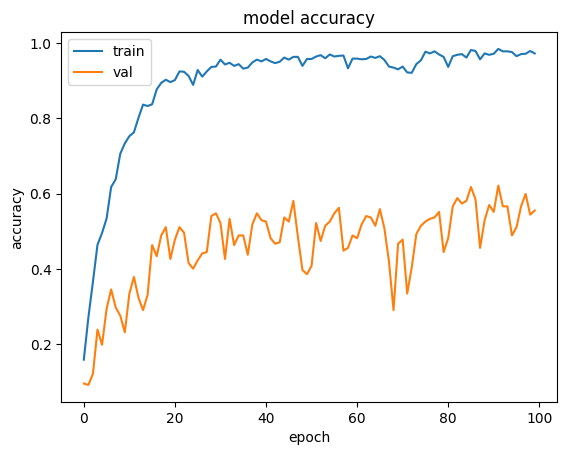

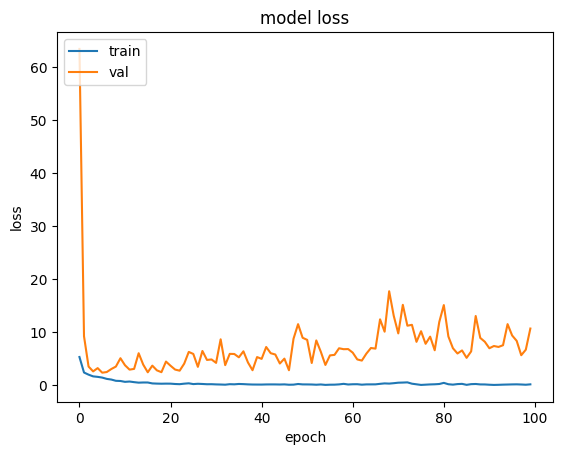

In [ ]:
# Draw the learning curves of model
plot_learning_curve(history)

## Part II Transfer learning with VGGNet19

In this part, we are going to cover how to load a pre-trained model, i.e., VGGNet19, and finetune it for our flower classification task.

In [ ]:
# load dependencies
from keras.applications.vgg19 import VGG19
from keras.preprocessing.image import ImageDataGenerator

### Load and prepare data

Here, let us use [ImageDataGenerator](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator) to load images on the fly from disk. We can also use it to perform random data augmentations in real time during training. Here, we rescale the data to between 0 and 1 (by multiplying by 1/255)

In [ ]:
datagen = ImageDataGenerator(
    rescale=1.0/255,
    data_format='channels_last',
    validation_split=0.2)

In [ ]:
train_generator = datagen.flow_from_directory(
    directory='17flowers/jpg/',
    target_size=(224, 224),
    classes=['0', '1', '10', '11', '12', '13', '14', '15', '16', '2', '3', '4', '5', '6', '7', '8', '9'],
    class_mode='categorical',
    batch_size=32,
    subset = 'training',
    shuffle=True,
    seed=42) # set as training data

Found 1088 images belonging to 17 classes.


In [ ]:
validation_generator = datagen.flow_from_directory(
     directory='17flowers/jpg/',
    target_size=(224, 224),
    classes=['0', '1', '10', '11', '12', '13', '14', '15', '16', '2', '3', '4', '5', '6', '7', '8', '9'],
    class_mode='categorical',
    batch_size=32,
    subset='validation',
    shuffle=True,
    seed=42) # set as validation data

Found 272 images belonging to 17 classes.


### Set up transfer learning

####Load the pre-trained VGG19 model

In [ ]:
vgg19 = VGG19(include_top=False,
              weights='imagenet',
              input_shape=(224,224,3),
              pooling=None)

80134624/80134624 [==============================] - 4s 0us/step


#### Freeze all the layers in the base VGGNet19 *model*

In [ ]:
for layer in vgg19.layers:
    layer.trainable = False

#### Add custom classification layer.

Here, we classify flowers into 17 categories, so the number of nodes in the final classificaiton layer is 17.

In [ ]:
# Instantiate the sequential model and add the VGG19 model:
model_t = Sequential()
model_t.add(vgg19)

# Add the custom layers atop the VGG19 model:
model_t.add(Flatten(name='flattened'))
model_t.add(Dropout(0.5, name='dropout'))
model_t.add(Dense(17, activation='softmax', name='predictions'))

### Configure and train model



In [ ]:
model_t.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history_t = model_t.fit(train_generator, steps_per_epoch=15,
                    epochs=16, validation_data=validation_generator,
                    validation_steps=15)

Epoch 1/16
15/15 [==============================] - 16s 624ms/step - batch: 7.0000 - size: 32.0000 - loss: 3.0542 - acc: 0.2479 - val_loss: 1.6903 - val_acc: 0.5582
Epoch 2/16
15/15 [==============================] - 5s 341ms/step - batch: 7.0000 - size: 32.0000 - loss: 1.4984 - acc: 0.5437 - val_loss: 1.3227 - val_acc: 0.6616
Epoch 3/16
15/15 [==============================] - 5s 341ms/step - batch: 7.0000 - size: 32.0000 - loss: 0.8688 - acc: 0.7354 - val_loss: 0.9080 - val_acc: 0.7349
Epoch 4/16
15/15 [==============================] - 5s 344ms/step - batch: 7.0000 - size: 32.0000 - loss: 0.5259 - acc: 0.8396 - val_loss: 0.7766 - val_acc: 0.7629
Epoch 5/16
15/15 [==============================] - 5s 342ms/step - batch: 7.0000 - size: 32.0000 - loss: 0.3342 - acc: 0.9021 - val_loss: 0.6913 - val_acc: 0.7759
Epoch 6/16
15/15 [==============================] - 5s 331ms/step - batch: 7.0000 - size: 32.0000 - loss: 0.1942 - acc: 0.9542 - val_loss: 0.6225 - val_acc: 0.8125
Epoch 7/16
15/1

### Draw learning curves

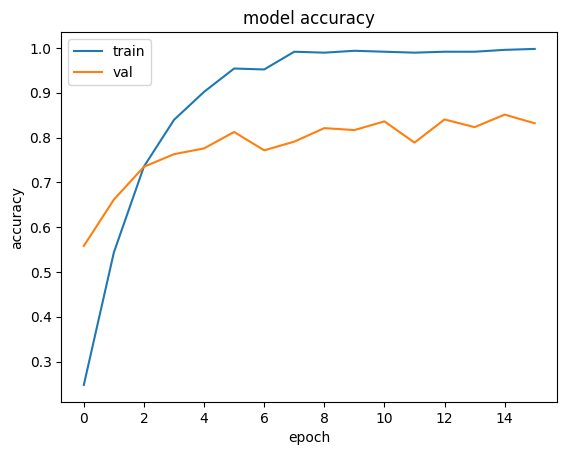

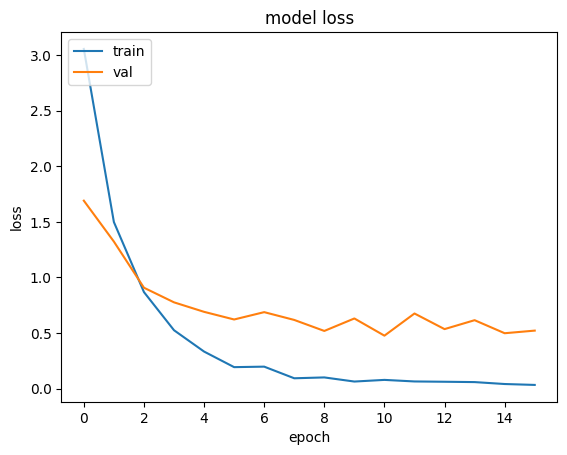

In [ ]:
# Draw the learning curves of model
plot_learning_curve(history_t)